# La librairie Pandas

##  1- la logique de pandas

L'objet central dans la logique `pandas` est le `DataFrame`.
Il s'agit d'une structure particulière de données
à deux dimensions alignant des lignes et colonnes. Les colonnes
peuvent être de types différents. 

Un DataFrame est composé des éléments suivants:

* l'indice de la ligne ;
* le nom de la colonne ;
* la valeur de la donnée ;

Structuration d'un DataFrame pandas, emprunté à <https://medium.com/epfl-extension-school/selecting-data-from-a-pandas-dataframe-53917dc39953>:

![](https://miro.medium.com/max/700/1*6p6nF4_5XpHgcrYRrLYVAw.png)


Les trois règles sont les suivantes:

* Chaque variable possède sa propre colonne
* Chaque observation possède sa propre ligne
* Une valeur, matérialisant la valeur d'une observation d'une variable, 
se trouve sur une unique cellule.

Charger vos données dans un DataFrame Pandas

https://www.youtube.com/redirect?q=http%3A%2F%2Fbiostat.mc.vanderbilt.edu%2Fwiki%2Fpub%2FMain%2FDataSets%2Ftitanic3.xls&redir_token=IS7fnKxJQSAQBgyL_W_n-Yg2XZJ8MTU4NzkxOTk0MkAxNTg3ODMzNTQy&v=zZkNOdBWgFQ&event=video_description

Les options les plus courantes :

    read_csv
    read_excel


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('titanic.csv') #Chargement des données sur le titanic dans le dataframe da

In [4]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


## 2 - Passez de Numpy à Pandas

Avec  Numpy, la librairie  Pandas  fait partie des librairies de base pour l'analyse de données en Python. Pandas fournit des structures de données puissantes et simples à utiliser, ainsi que les moyens d'opérer rapidement des opérations sur ces structures. Dans ce notebook, nous verrons l'intérêt de la librairie Pandas, ainsi que les opérations basiques sur l'objet phare de cette librairie, le dataframe.

Mais commençons par un peu de réflexion !

Réfléchissons un peu

Imaginons que nous souhaitions représenter des animaux. Disons... des pandas par exemple !

Nous pouvons caractériser un panda par sa taille ; ou plutôt, par ses tailles : disons par exemple, la taille de ses pattes, la longueur moyenne des poils de sa fourrure, la taille de sa queue, et le diamètre de son ventre.

On peut représenter ce pandas par un tableau numpy :

In [5]:
import numpy as np
un_panda_numpy = np.array([100,5,20,80])
un_panda_numpy

array([100,   5,  20,  80])

ci, notre panda a des pattes de 100cm, des poils de 5cm en moyenne, une queue de 20cm et un ventre de 80cm de diamètre.

Et si je veux représenter plusieurs pandas, je crée une liste de np.array?

C'est une bonne idée. Il est effectivement possible de faire cela :

In [6]:
#créer une famille 
famille_panda = [
    [100, 5  , 20, 80], # maman panda[100, 5  , 20, 80]
    [50 , 2.5, 10, 40], # bébé panda[50 , 2.5, 10, 40
    [110, 6  , 22, 80], # papa panda[110, 6  , 22, 80]
]

Mais comme nous l'avons vu précédemment, nous pouvons faire mieux car notre liste de 3 pandas, c'est en fait un tableau multidimensionnel, que NumPy gère très bien !

In [7]:
famille_panda_numpy = np.array(famille_panda)
famille_panda_numpy

array([[100. ,   5. ,  20. ,  80. ],
       [ 50. ,   2.5,  10. ,  40. ],
       [110. ,   6. ,  22. ,  80. ]])

Ici, nous avons créé une liste de pandas, c'est à dire une liste de listes ; des listes imbriquées en fait ! En langage Numpy, on dit que le rang de famille_panda_numpy est de 2, car nous avons 2 niveaux d'imbrication.

Quel avantage?

Par exemple, supposons que je veuille obtenir la taille des pattes (situé en position 0 dans chaque liste qui décrit un panda) du panda situé en position 2 dans ma liste (c'est-à-dire papa panda). Numpy offre la possibilité de le faire élégamment :

In [8]:
famille_panda_numpy[2, 0] # taille des pattes de papa panda, à la manière numpy

110.0

Et si je veux connaître les tailles des pattes de toute ma famille panda ?

Facile ! Il suffit de supprimer le 2 (qui correspondait au papa panda), et de le remplacer par le caractère:, signifiant que je veux TOUS les pandas !



In [9]:
famille_panda_numpy[:, 0]
#array([ 100., 50., 110.])


array([100.,  50., 110.])

Voilà ! La taille des pattes de la maman est de 100cm, celle du bébé 50cm, et celle du papa 110cm.

C'est assez pratique certes, mais écrire  famille_panda_numpy[:, 0]  quand on veut connaître la taille des pattes des pandas, ce n'est pas très explicite. j'aimerais pouvoir spécifier quelque-part que ce  0  correspond à la taille des pattes !

Cela nous amène à la librairie Pandas 

Tout est une histoire de tableau !

In [10]:
famille_panda = [
    [100, 5  , 20, 80],
    [50 , 2.5, 10, 40],
    [110, 6  , 22, 80],
]

... ça ressemble un peu à un tableau avec des lignes et des colonnes non ? Vous ne trouvez pas que c'est très similaire à cela?

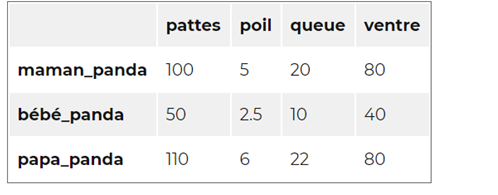

La bonne réponse est : "Oui, c'est très similaire")

Dans ce cas, pourquoi ne pas utiliser une librairie Python qui manipulerait des tableaux comme celui-ci ? Cette librairie existe, et elle s'appelle Pandas.

C'est parti, représentons nos pandas avec Pandas !

In [11]:
import pandas as pd
famille_panda_df = pd.DataFrame(famille_panda)
famille_panda_df

,0,1,2,3
0,100,5.0,20,80
1,50,2.5,10,40
2,110,6.0,22,80


L'objet qui permet de représenter des "tableaux" est l'objet DataFrame. Pour instancier un tel objet (et pour lui donner de la donnée), on lui transmet une liste de rang 2, c'est à dire une liste de listes.

Nous pouvons même faire mieux, en indiquant les noms de colonnes et les noms des lignes. Et encore mieux : la librairie Pandas se base en grande partie sur la librairie Numpy dans son fonctionnement interne. Comme pandas connaît intimement Numpy, on peut très bien transmettre à l'objet DataFrame de la donnée au format ndarray :

In [12]:
famille_panda_df = pd.DataFrame(famille_panda,
                                index = ['maman', 'bebe', 'papa'],
                                columns = ['pattes', 'poil', 'queue', 'ventre'])
famille_panda_df

,pattes,poil,queue,ventre
maman,100,5.0,20,80
bebe,50,2.5,10,40
papa,110,6.0,22,80


Le nom des lignes est appelé index. Un index peut être une chaîne de caractères (un label) ou un nombre entier. Quand aucun index n'est spécifié à la création du dataframe, il est initialisé par défaut avec une suite continue d'entiers commençant par 0.

'objet DataFrame est très similaire à certains concepts que l'on trouve en dehors du cadre du langage Python. Il est similaire :

aux tables des bases de données relationnelles (type MySQL, PostgreSQL, etc.) que l'on manipule grâce au langage SQL

à l'objet dataframe sur lequel se base tout le langage R, langage destiné aux statisticiens et aux Data Analysts

Quelques fonctionnalités des DataFrames
Voici quelques petites fonctionnalités des Dataframes.

Tout d'abord, accédons à la colonne ventre de notre table. Il y a deux syntaxes possibles, qui renvoient exactement le même résultat :

In [13]:
famille_panda_df.ventre


maman    80
bebe     40
papa     80
Name: ventre, dtype: int64

In [14]:
famille_panda_df["ventre"]

maman    80
bebe     40
papa     80
Name: ventre, dtype: int64

L'objet que renvoie famille_panda_df["ventre"] est de type pandas.Series. Pour obtenir les valeurs de la colonne ventre au format numpy, il faut saisir famille_panda_df["ventre"].values

 Parcourrons maintenant tous les pandas un à un, grâce à la méthode iterrows qui renvoie (à chaque itération de la boucle for) un tuple dont le premier élément est l'index de la ligne, et le second le contenu de la ligne en question :

In [15]:
for ind_ligne, contenu_ligne in famille_panda_df.iterrows():
    print("Voici le panda %s :" % ind_ligne)
    print(contenu_ligne)
    print("--------------------")

Voici le panda maman :
pattes    100.0
poil        5.0
queue      20.0
ventre     80.0
Name: maman, dtype: float64
--------------------
Voici le panda bebe :
pattes    50.0
poil       2.5
queue     10.0
ventre    40.0
Name: bebe, dtype: float64
--------------------
Voici le panda papa :
pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64
--------------------


Accédons maintenant au papa panda : d'abord par sa position (position 2), puis par son nom "papa". Le résultat retourné est exactement le même dans les 2 cas.

In [16]:
famille_panda_df.iloc[2] # Avec iloc(), indexation positionnell

pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64

In [17]:
famille_panda_df.loc["papa"] # Avec loc(), indexation par label

pattes    110.0
poil        6.0
queue      22.0
ventre     80.0
Name: papa, dtype: float64

Déterminons les pandas dont le diamètre du ventre est de 80cm :



In [18]:
famille_panda_df["ventre"] == 80

maman     True
bebe     False
papa      True
Name: ventre, dtype: bool

Ici, on teste chaque élément de la colonne "ventre" en demandant s'il est égal à 80. On obtient la réponse suivante : "maman" : True, "bebe" : False, "papa" : True.

Le résultat de cette opération est très pratique pour filtrer des lignes ! Par exemple, pour sélectionner uniquement les pandas dont le ventre est de 80cm, il suffit d'intégrer ce précédent résultat en tant que masque, comme ceci :

In [19]:
masque = famille_panda_df["ventre"] == 80
pandas_80 = famille_panda_df[masque]

# On écrit plus souvent cela de cette manière :
# pandas_80 = famille_panda_df[famille_panda_df["ventre"] == 80]

pandas_80

,pattes,poil,queue,ventre
maman,100,5.0,20,80
papa,110,6.0,22,80


Qu'est-ce qu'un masque ?

Lorsque vous mettez un masque sur votre visage, celui-ci cache certaines parties de votre tête, mais en laisse visible d'autres : vos yeux, votre nez et votre bouche. Ici, c'est un peu la même chose : comme nous souhaitons ne garder que certaines lignes du dataframe, et en cacher d'autres, nous appliquons un masque. Un masque est ici une liste de variables booléennes (TrueouFalse) dans laquelle chaque élément est associé à une ligne du dataframe. Si cet élément estTrue, cela signfie que nous souhaitons garder la ligne en question. Si nous souhaitons ne pas garder la ligne, cet élément estFalse.

Pour inverser le masque, il suffit d'utiliser l'opérateur~, et nous sélectionnons les pandas qui n'ont pas un ventre de 80cm :

In [20]:
famille_panda_df[~masque]

,pattes,poil,queue,ventre
bebe,50,2.5,10,40


Maintenant, ajoutons des lignes à notre dataframe. Il y a plusieurs méthodes pour cela, mais voyons ici la plus simple : assemblons ensemble deux dataframes.

In [21]:
quelques_pandas = pd.DataFrame([[105,4,19,80],[100,5,20,80]],      # deux nouveaux pandas
                               columns = famille_panda_df.columns) 
                               # même colonnes que famille_panda_df
tous_les_pandas = famille_panda_df.append(quelques_pandas)
tous_les_pandas

,pattes,poil,queue,ventre
maman,100,5.0,20,80
bebe,50,2.5,10,40
papa,110,6.0,22,80
0,105,4.0,19,80
1,100,5.0,20,80


Dans le dataframe tous_les_pandas, il y a des doublons. En effet, le premier panda (maman) et le dernier panda (dont l'index est 1) ont exactement les mêmes mesures. Si nous souhaitions dédoublonner, nous ferions ceci :

In [22]:
tous_les_pandas.drop_duplicates()

,pattes,poil,queue,ventre
maman,100,5.0,20,80
bebe,50,2.5,10,40
papa,110,6.0,22,80
0,105,4.0,19,80


In [23]:
tous_les_pandas

,pattes,poil,queue,ventre
maman,100,5.0,20,80
bebe,50,2.5,10,40
papa,110,6.0,22,80
0,105,4.0,19,80
1,100,5.0,20,80


Le résultat de cette ligne ne modifie pas le dataframe  tous_les_pandas  . Il ne fait que renvoyer un autre dataframe. Dans l'état actuel, ce nouveau dataframe est juste affiché et n'est pas enregistré en mémoire : il sera donc perdu. Pour le garder, on peut soit l'enregistrer dans une nouvelle variable, ...

In [24]:
pandas_uniques = tous_les_pandas.drop_duplicates()

In [25]:
pandas_uniques

,pattes,poil,queue,ventre
maman,100,5.0,20,80
bebe,50,2.5,10,40
papa,110,6.0,22,80
0,105,4.0,19,80


 ... soit remplacer la variable tous_les_pandas par ce nouveau dataframe dédoublonné :

In [26]:
tous_les_pandas = tous_les_pandas.drop_duplicates()

Allez, encore un petit effort ! Voici quelques autres fonctionnalités en vrac, que nous utiliserons dans le projet :

In [27]:
# accéder aux noms des colonnes
famille_panda_df.columns

Index(['pattes', 'poil', 'queue', 'ventre'], dtype='object')

In [28]:
# créer une nouvelle colonne, composée de chaînes de caractères
famille_panda_df["sexe"] = ["f", "f", "m"] 

famille_panda_df

,pattes,poil,queue,ventre,sexe
maman,100,5.0,20,80,f
bebe,50,2.5,10,40,f
papa,110,6.0,22,80,m


In [43]:
famille_panda_df["ventre + pattes"] = famille_panda_df["ventre"] + famille_panda_df["pattes"] 

In [44]:
famille_panda_df

,pattes,poil,queue,ventre,sexe,ventre + pattes
maman,100,5.0,20,80,f,180
bebe,50,2.5,10,40,f,90
papa,110,6.0,22,80,m,190


In [40]:
# obtenir le nombre de lignes
len(famille_panda_df)

3

In [42]:
famille_panda_df.shape

(3, 5)

In [ ]:
# accéder aux noms des colonnes
famille_panda_df.columns

# créer une nouvelle colonne, composée de chaînes de caractères
famille_panda_df["sexe"] = ["f", "f", "m"] 
# la maman et le bébé sont des femelles, le papa est un mâle

# obtenir le nombre de lignes
len(famille_panda_df)

## 3 - Manipuler des dataframes

Maintenant que vous savez comment créer un DataFrame, intéressons à d'autres opérations usuelles sur les données. Pour ce faire, je vous propose d'utiliser un DataSet disponible dans la librairie Seaborn ! Le dataset en question comprend des données sur les survivants du naufrage du Titanic !

Dans cette partie, nous allons suivre une session de travail "typique".

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic') #chargement d'un jeu de données

Aperçu rapide

La première chose à faire est de jeter un rapide coup d'oeil à nos données.

In [46]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


La fonction  tail  est le pendant de la fonction  head  . Elle affiche les derniers éléments du DataFrame.

Jetons un coup d'oeil à tous les âges. La fonction unique renvoie les valeurs uniques présentes dans une structure de données Pandas.

In [29]:
titanic.age.unique()

NameError: name 'titanic' is not defined

Remarquez la présence de valeurs inférieures à 1!

Mentionnons aussi l'excellente fonction  describe . Elle donne des statistiques diverses (moyenne, maximum, minimum, etc.) sur les données contenues dans chaque colonne:



In [48]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


L'argument include="all" sert à inclure les colonnes non-numérique dans l'analyse. Cette fonction nous fournit pleins de données très utiles sur la répartition de nos données (minimum, maximum, moyenne, etc.)

Données manquantes
 Vous aurez remarqué, dans la sortie de la fonction  describe  , des valeurs  NaN  . C'est une valeur définie pour représenter quelque chose qui n'est pas un nombre (Not a Number) alors que son type l'exige. Par exemple, on obtient NaN si on demande à Pandas de calculer la moyenne d'une colonne de texte. 

Plus généralement, le résultat de toute opération impliquant une NaN est à son tour un NaN. Par exemple, si une de vos colonnes contient une NaN (parce que la vraie valeur n'est pas connue), le résultat de toutes les opérations arithmétiques qui impliquent cette valeur (comme la moyenne de la colonne) sera NaN, sauf si vous prenez soin de ne pas prendre en compte cette valeur (Pandas le fait, par exemple sur la colonne age, dans notre exemple).

Le traitement à des valeurs manquantes est abordé dans un autre cours. Nous allons simplement voir deux opérations à appliquer aux NaN.

La première consiste à remplacer les NaN par d'autres valeurs. Cette opération s'effectue grâce à la fonction  fillna  .  Regardons son application sur la colonne  age  .

In [49]:
titanic.age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [50]:
#Renvoie un DataFrame où toutes les  NaN  dans la colonne  age  on été remplacés par 0.
titanic.fillna(value={"age": 0}).age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [51]:
#Nous aurions aussi pu remplir les NaN par les valeurs précédentes:

titanic.fillna(method="pad").age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

Enfin, la fonction  dropna  permet de supprimer les axes (colonnes ou lignes) qui contiennent des NaN. Par défaut, elle supprime les lignes concernées:

In [52]:
titanic.dropna().head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


Mais on peut aussi lui demander de supprimer carrément les colonnes!

In [ ]:
titanic.dropna(axis="columns").head()

### Renommer une colonne

La fonction rename permet de renommer les colonnes ou les lignes d'un DataFrame. Elle s'utilise de deux façon.



In [ ]:
titanic.rename(columns={"sex":"sexe"})
 

### Supprimer des axes

La fonction  drop  permet de supprimer des axes (colonnes ou lignes) d'un DataFrame. Son utilisation est plutôt simple.

In [ ]:
titanic.drop(0)

#Supprime la ligne dont l'index est égal à 0.

titanic.drop(columns=["age"])
#Supprime la colonne "age"



Bon nombre de fonctions Pandas, telles que  dropna  ,  fillna  ,  drop  , etc acceptent un argument  inplace  .  Si la valeur de cet argument est  True  , le DataFrame donné en argument est modifié. Sinon, une copie du DataFrame est retournée par la fonction.

### Tableaux croisés dynamiques



Avant de vous lancer dans l'algèbre relationnelle, mentionnons les tableaux croisés dynamiques. Vous êtes peut-être familier avec ce concept, par exemple parce que vous les avez utilisé dans des logiciels tableurs.

Ces tableaux, encore appelés tables de pivots (ou pivot table), permettent de synthétiser les données contenues dans un DataFrame. Essayons de voir cela par l'exemple.

Pour voir la répartition des survivants en fonction de leurs sexes et de leur type de billet, nous n'avons besoin que d'une seule ligne:

In [53]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Le résultat est parfaitement compréhensible.

Par défaut, la fonction pivot_table groupe les données en fonction des critères que nous spécifions, et agrège les résultats en moyenne. Nous pouvons spécifier d'autres fonctions. Par exemple, si nous voulons savoir quelle est le nombre total de survivants dans chaque cas, nous utiliserons la fonction  sum  .

In [54]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc="sum")

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


Bien sûr, cela ne fonctionne que parce que les auteurs du dataset ont judicieusement choisi de représenter la survie avec des 0 et des 1 ! 

La fonction pivot_table est très puissante, et permet même de faire des agrégations à plusieurs niveaux. Par exemple, nous pouvons voir l'âge des survivants comme une dimension supplémentaires. Le nombre exact d'années nous intéressant peu, nous regrouperons les âge en deux catégories, grâce à la fonction  cut 

In [55]:
titanic.dropna(inplace=True)
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.500000
       (18, 80]  0.968254  0.875000  0.666667
male   (0, 18]   0.800000  1.000000  1.000000
       (18, 80]  0.397436  0.333333  0.250000

Remarquez les deux niveaux d'indexation à gauche.

Nous n'allons pas parler en détail des DataFrame à indexation multiple. Sachez seulement que Pandas est capable de les gérer, et que les fonctions pandas sont capables, en utilisant les bons arguments, de travailler avec ces DataFrames. 



Lorsque vous utilisez un nouveau DataFrame, la première chose que vous devez faire est de l'explorer et de voir ce qu'il contient. Il existe plusieurs méthodes et attributs utiles pour cela.

.head () renvoie les premières lignes (la «tête» du DataFrame).

.info () affiche des informations sur chacune des colonnes, telles que le type de données et le nombre de valeurs manquantes.

.shape renvoie le nombre de lignes et de colonnes du DataFrame.

.describe () calcule quelques statistiques récapitulatives pour chaque colonne.

le homelessness est un DataFrame contenant des estimations des sans-abri dans chaque État américain en 2018. La colonne individual est le nombre de sans-abri ne faisant pas partie d'une famille avec enfants. 

La colonne family_members est le nombre de sans-abri faisant partie d'une famille avec enfants. La colonne state_pop est la population totale de l'État.

### Groupby() et value_counts()

In [56]:
titanic.groupby(['sex']).mean() #calcule la moyenne des indicateurs par sexe

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900,0.000000,0.363636
male,0.436170,1.170213,38.382128,0.404255,0.414894,69.482049,0.925532,0.489362


In [57]:
titanic.groupby(['sex', 'pclass']).mean() #calcule la moyenne des indicateurs par sexe et par classe

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.959459  34.094595  0.581081  0.554054  103.128209   
       2       0.888889  29.611111  0.222222  0.111111   14.865744   
       3       0.600000  17.200000  0.400000  1.200000   13.360000   
male   1       0.421687  40.619518  0.409639  0.397590   76.445333   
       2       0.666667  18.750000  0.666667  0.833333   23.812500   
       3       0.400000  24.800000  0.000000  0.200000    8.695000   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.324324  
       2         0.000000  0.888889  
       3         0.000000  0.000000  
male   1         0.963855  0.481928  
       2         0.500000  0.333333  
       3         0.800000  0.800000

sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

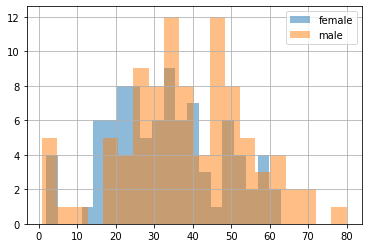

In [63]:
titanic.groupby(['sex'])['age'].hist( alpha = 0.5,legend=True, bins = 20)

In [65]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


# 4 - EXERCICE

In [35]:
#charger le fichier 'homelessness.csv'

homelessness =pd.read_csv("homelessness.csv",sep=';')


#afficher les premières lignes 
hl = homelessness
homelessness.head()



,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [32]:
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [33]:
#afficher les informations sur le dataframe
len(hl)

51

In [36]:
hl.shape

(51, 5)

In [70]:
#utiliser describe pour décrire toutes les features du dataframe

hl.describe(include= "all")


,region,state,individuals,family_members,state_pop,total_ind,p_individuals,indiv_per_10k
count,51,51,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
unique,9,51,NaN,NaN,NaN,NaN,NaN,NaN
top,South Atlantic,Nevada,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7225.784314,3504.882353,6.405637e+06,10730.666667,0.104300,10.430003
std,NaN,NaN,15991.025083,7805.411811,7.327258e+06,21777.558637,0.088298,8.829762
min,NaN,NaN,434.000000,75.000000,5.776010e+05,542.000000,0.034351,3.435066
25%,NaN,NaN,1446.500000,592.000000,1.777414e+06,2318.500000,0.060498,6.049805
50%,NaN,NaN,3082.000000,1482.000000,4.461153e+06,4907.000000,0.071224,7.122409
75%,NaN,NaN,6781.500000,3196.000000,7.340946e+06,9448.500000,0.099947,9.994721


Pour mieux comprendre les objets DataFrame, il est utile de savoir qu'ils se composent de trois composants, stockés en tant qu'attributs:

    .values: tableau de valeurs NumPy bidimensionnel.
    
    .columns: Un index des colonnes: les noms des colonnes.
    
    .index: un index pour les lignes: soit des numéros de ligne, soit des noms de ligne.

Vous pouvez généralement considérer les index comme une liste de chaînes ou de nombres, bien que le type de données Pandas Index permette des options plus sophistiquées. (Celles-ci seront traitées plus tard dans le cours.)

In [72]:
# Imprimez les valeurs de homelessness
# print(hl.values)

# Imprimer l'index des colonnes de l'itinérance
print(hl.columns)

# Imprimer l'index des lignes
print(hl.index)


Index(['region', 'state', 'individuals', 'family_members', 'state_pop',
       'total_ind', 'p_individuals', 'indiv_per_10k'],
      dtype='object')
RangeIndex(start=0, stop=51, step=1)


Tri des lignes

Il est souvent plus facile de trouver des bits de données intéressants dans un DataFrame si vous modifiez l'ordre des lignes. Vous pouvez trier les lignes en passant un nom de colonne à .sort_values ​​().

Dans les cas où les lignes ont la même valeur (cela est courant si vous triez sur une variable catégorielle), vous pouvez souhaiter rompre les liens en triant sur une autre colonne. Vous pouvez trier sur plusieurs colonnes de cette manière en passant une liste de noms de colonnes.

    Trier sur une colonne df.sort_values("race")

    plusieurs colonnes df.sort_values(["race", "weight_kg"])

En combinant .sort_values() avec .head (), vous pouvez répondre aux questions sous la forme "Quels sont les cas principaux où…?".




In [74]:
# Trier le dataframe par individu
homelessness_ind = hl.sort_values(['individuals'])

# Imprimer les quelques premières lignes
homelessness_ind.head()

,region,state,individuals,family_members,state_pop,total_ind,p_individuals,indiv_per_10k
50,Mountain,Wyoming,434.0,205.0,577601,639.0,0.075138,7.513837
34,West North Central,North Dakota,467.0,75.0,758080,542.0,0.061603,6.160300
7,South Atlantic,Delaware,708.0,374.0,965479,1082.0,0.073331,7.333148
39,New England,Rhode Island,747.0,354.0,1058287,1101.0,0.070586,7.058577
45,New England,Vermont,780.0,511.0,624358,1291.0,0.124928,12.492833


In [48]:
# Trier le dataframe en fonction des membres de la famille  - > descendant (du plus grand au plus petit)
homelessness_fam = hl.sort_values(['family_members'], ascending = False )

# Imprimer les quelques premières lignes
homelessness_fam.head(10)

,region,state,individuals,family_members,state_pop
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
4,Pacific,California,109008.0,20964.0,39461588
21,New England,Massachusetts,6811.0,13257.0,6882635
9,South Atlantic,Florida,21443.0,9587.0,21244317
43,West South Central,Texas,19199.0,6111.0,28628666
47,Pacific,Washington,16424.0,5880.0,7523869
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
13,East North Central,Illinois,6752.0,3891.0,12723071
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
37,Pacific,Oregon,11139.0,3337.0,4181886


In [49]:
# Trier le dataframe  par région, puis les membres de la famille descendants
homelessness_reg_fam = hl.sort_values(['region', 'family_members'], 
                           ascending = [True,      False] )

# Imprimer les quelques premières lignes
homelessness_reg_fam.head(10)

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752.0,3891.0,12723071
35,East North Central,Ohio,6929.0,3320.0,11676341
22,East North Central,Michigan,5209.0,3142.0,9984072
49,East North Central,Wisconsin,2740.0,2167.0,5807406
14,East North Central,Indiana,3776.0,1482.0,6695497
42,East South Central,Tennessee,6139.0,1744.0,6771631
17,East South Central,Kentucky,2735.0,953.0,4461153
0,East South Central,Alabama,2570.0,864.0,4887681
24,East South Central,Mississippi,1024.0,328.0,2981020
32,Mid-Atlantic,New York,39827.0,52070.0,19530351


In [50]:
# Sélectionnez la colonne des individus
individus = hl[['individuals']]

# Imprimer la tête du résultat
individus.head(10)

,individuals
0,2570.0
1,1434.0
2,7259.0
3,2280.0
4,109008.0
5,7607.0
6,2280.0
7,708.0
8,3770.0
9,21443.0


In [51]:
# Sélectionnez les colonnes state et family_members
state_fam = hl[['state', 'family_members']]

# Imprimer la tête du résultat
state_fam.head(10)

,state,family_members
0,Alabama,864.0
1,Alaska,582.0
2,Arizona,2606.0
3,Arkansas,432.0
4,California,20964.0
5,Colorado,3250.0
6,Connecticut,1696.0
7,Delaware,374.0
8,District of Columbia,3134.0
9,Florida,9587.0


In [76]:
# Sélectionnez uniquement les individus et state, dans cet ordre
ind_state = hl[['individuals', 'state']]

# Imprimer la tête du résultat
ind_state.head(10)

,individuals,state
0,2570.0,Alabama
1,1434.0,Alaska
2,7259.0,Arizona
3,2280.0,Arkansas
4,109008.0,California
5,7607.0,Colorado
6,2280.0,Connecticut
7,708.0,Delaware
8,3770.0,District of Columbia
9,21443.0,Florida


Sous-ensemble de lignes


Une grande partie de la science des données consiste à trouver quelle partie de votre jeu de données est la plus intéressante. 

L'une des techniques les plus simples consiste à rechercher un sous-ensemble de lignes correspondant à certains critères. Ceci est parfois appelé filtrage des lignes ou sélection de lignes.

Il existe de nombreuses façons de sous-définir un DataFrame, la plus courante étant peut-être d'utiliser des opérateurs relationnels pour renvoyer Vrai ou Faux pour chaque ligne, puis passer cela entre crochets.

chiens [chiens ["height_cm"]> 60]
chiens [chiens ["color"] == "tan"]

Vous pouvez filtrer simultanément plusieurs conditions en utilisant l'opérateur "logique et", &.

chiens [(chiens ["height_cm"]> 60) & (chiens ["col_b"] == "tan")]

In [53]:
# Filtrer les lignes où les individus sont supérieurs à 10000
ind_gt_10k = hl[ hl['individuals'] > 10000 ]

# Voir le résultat
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


In [54]:
# Filtrer les lignes où la région est Mountain
mountain_reg = hl[ hl['region'] == "Mountain" ]

# Voir le résultat
mountain_reg.head(10)

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
5,Mountain,Colorado,7607.0,3250.0,5691287
12,Mountain,Idaho,1297.0,715.0,1750536
26,Mountain,Montana,983.0,422.0,1060665
28,Mountain,Nevada,7058.0,486.0,3027341
31,Mountain,New Mexico,1949.0,602.0,2092741
44,Mountain,Utah,1904.0,972.0,3153550
50,Mountain,Wyoming,434.0,205.0,577601


In [56]:
# Filtrerles lignes où family_members est inférieur à 1000
# et la région est Pacifique
fam_lt_1k_pac = hl[ (hl['region'] == "Pacific") & (hl['family_members'] < 1000) ]

# Voir le résultat
print (fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


Sous-ensemble de lignes par variables catégorielles

Le sous-ensemble de données basé sur une variable catégorielle implique souvent l'utilisation de l'opérateur "ou" (|) pour sélectionner des lignes dans plusieurs catégories. 

Cela peut devenir fastidieux lorsque vous souhaitez que tous les états dans l'une des trois régions différentes, par exemple.

Utilisez plutôt la méthode .isin (), qui vous permettra de résoudre ce problème en écrivant une condition au lieu de trois conditions distinctes.

couleurs = ["marron", "noir", "tan"]
condition = chiens ["couleur"]. isin (couleurs)
chiens [condition]

In [61]:
# Sous-ensemble de lignes dans les régions de l'Atlantique Sud ou du Centre de l'Atlantique
region_filter = hl['region'].isin(["South Atlantic", "Mid-Atlantic"])

south_mid_atlantic = hl[region_filter]

# Voir le résultat
south_mid_atlantic.head(10)

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317
10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,South Atlantic,Maryland,4914.0,2230.0,6035802
30,Mid-Atlantic,New Jersey,6048.0,3350.0,8886025
32,Mid-Atlantic,New York,39827.0,52070.0,19530351
33,South Atlantic,North Carolina,6451.0,2817.0,10381615
38,Mid-Atlantic,Pennsylvania,8163.0,5349.0,12800922
40,South Atlantic,South Carolina,3082.0,851.0,5084156


In [63]:
# Les états du désert de Mojave
canu = ["Californie", "Arizona", "Nevada", "Utah"]

# Filtrer les lignes dans les états du désert de Mojave
mojave_homelessness = hl[hl['state'].isin(canu)]

# Voir le résultat
print(mojave_homelessness)

      region    state  individuals  family_members  state_pop
2   Mountain  Arizona       7259.0          2606.0    7158024
28  Mountain   Nevada       7058.0           486.0    3027341
44  Mountain     Utah       1904.0           972.0    3153550


vous pouvez ajouter de nouvelles colonnes à un DataFrame. Cela porte de nombreux noms, tels que transformation, mutation et feature engineering.

Vous pouvez créer de nouvelles colonnes à partir de zéro, mais il est également courant de les dériver à partir d'autres colonnes, par exemple, en ajoutant des colonnes ou en modifiant leurs unités.

In [65]:
# Ajouter la colonne total_ind comme étant la somme des individus et des membres de la famille
hl['total_ind'] = hl['individuals'] + hl['family_members']

# Ajoutez une autre colonne , nommée p_individuals, contenant la proportion de sans-abri dans chaque État.
hl['p_individuals'] = hl['individuals'] / hl['state_pop'] * 100

# Voir le résultat
hl.head(10)

,region,state,individuals,family_members,state_pop,total_ind,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.052581
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.195065
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.101411
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.075754
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.276238
5,Mountain,Colorado,7607.0,3250.0,5691287,10857.0,0.133660
6,New England,Connecticut,2280.0,1696.0,3571520,3976.0,0.063838
7,South Atlantic,Delaware,708.0,374.0,965479,1082.0,0.073331
8,South Atlantic,District of Columbia,3770.0,3134.0,701547,6904.0,0.537384
9,South Atlantic,Florida,21443.0,9587.0,21244317,31030.0,0.100935


Attaque combinée!

Vous avez vu les quatre types de manipulation de données les plus courants: le tri des lignes, le sous-ensemble des colonnes, le sous-ensemble des lignes et l'ajout de nouvelles colonnes. Dans une analyse de données réelles, vous pouvez mélanger et assortir ces quatre manipulations pour répondre à une multitude de questions.

Dans cet exercice, vous répondrez à la question: "Quel État a le plus grand nombre de sans-abri pour 10 000 habitants dans l'État?" Combinez vos nouvelles compétences de pandas pour le découvrir.

In [68]:
# Créer indiv_per_10k col le nombre de sans-abri par tranche de 10 000 habitants
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop']

# sous-ensemble de lignes où indiv_per_10k est supérieure à 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

# Trier high_homelessness en descendant indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending = False)

# Dans high_homelessness_srt, sélectionnez state et indiv_per_10k 
result = high_homelessness_srt[['state', 'indiv_per_10k']]

# Voir le résultat
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


Pour continuer à pratiquer 

https://www.kaggle.com/learn/pandas